In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product
from joblib import Parallel, delayed

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength                                             10.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             30.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             50.0    \
iobs                                                            
0           [4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...   
1           [1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...   

wavelength                                             70.0    \
iobs                                                            
0           [9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...   
1           [8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...   

wavelength                                             90.0    \
iobs                                                            
0           [8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...   
1           [8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...   

wavelength                                             110.0   \
iobs                                                            
0           [0.00028939, 0.00085966, 0.00025527, 0.0001117...   
1           [0.00029871, 0.00092469, 0.0002547, 0.0001111,...   

wavelength                                             130.0   \
iobs                                                            
0           [0.00060159, 0.0015886, 0.0007023, 0.0002723, ...   
1           [0.00058962, 0.0018025, 0.00070055, 0.00027331...   

wavelength                                             150.0   \
iobs                                                            
0           [0.00079509, 0.0030784, 0.00080502, 0.00050972...   
1           [0.00078938, 0.0032975, 0.00080607, 0.00048103...   

wavelength                                             170.0   \
iobs                                                            
0           [0.0008913, 0.00566, 0.0013939, 0.00056179, 0....   
1           [0.00088974, 0.0060483, 0.0013921, 0.00056177,...   

wavelength                                             190.0   ...  \
iobs                                                           ...   
0           [0.0008789, 0.0050446, 0.0013068, 0.00060908, ...  ...   
1           [0.00087734, 0.0050459, 0.0011036, 0.00063516,...  ...   

wavelength                                             9810.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9830.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9850.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9870.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9890.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9910.0  \


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


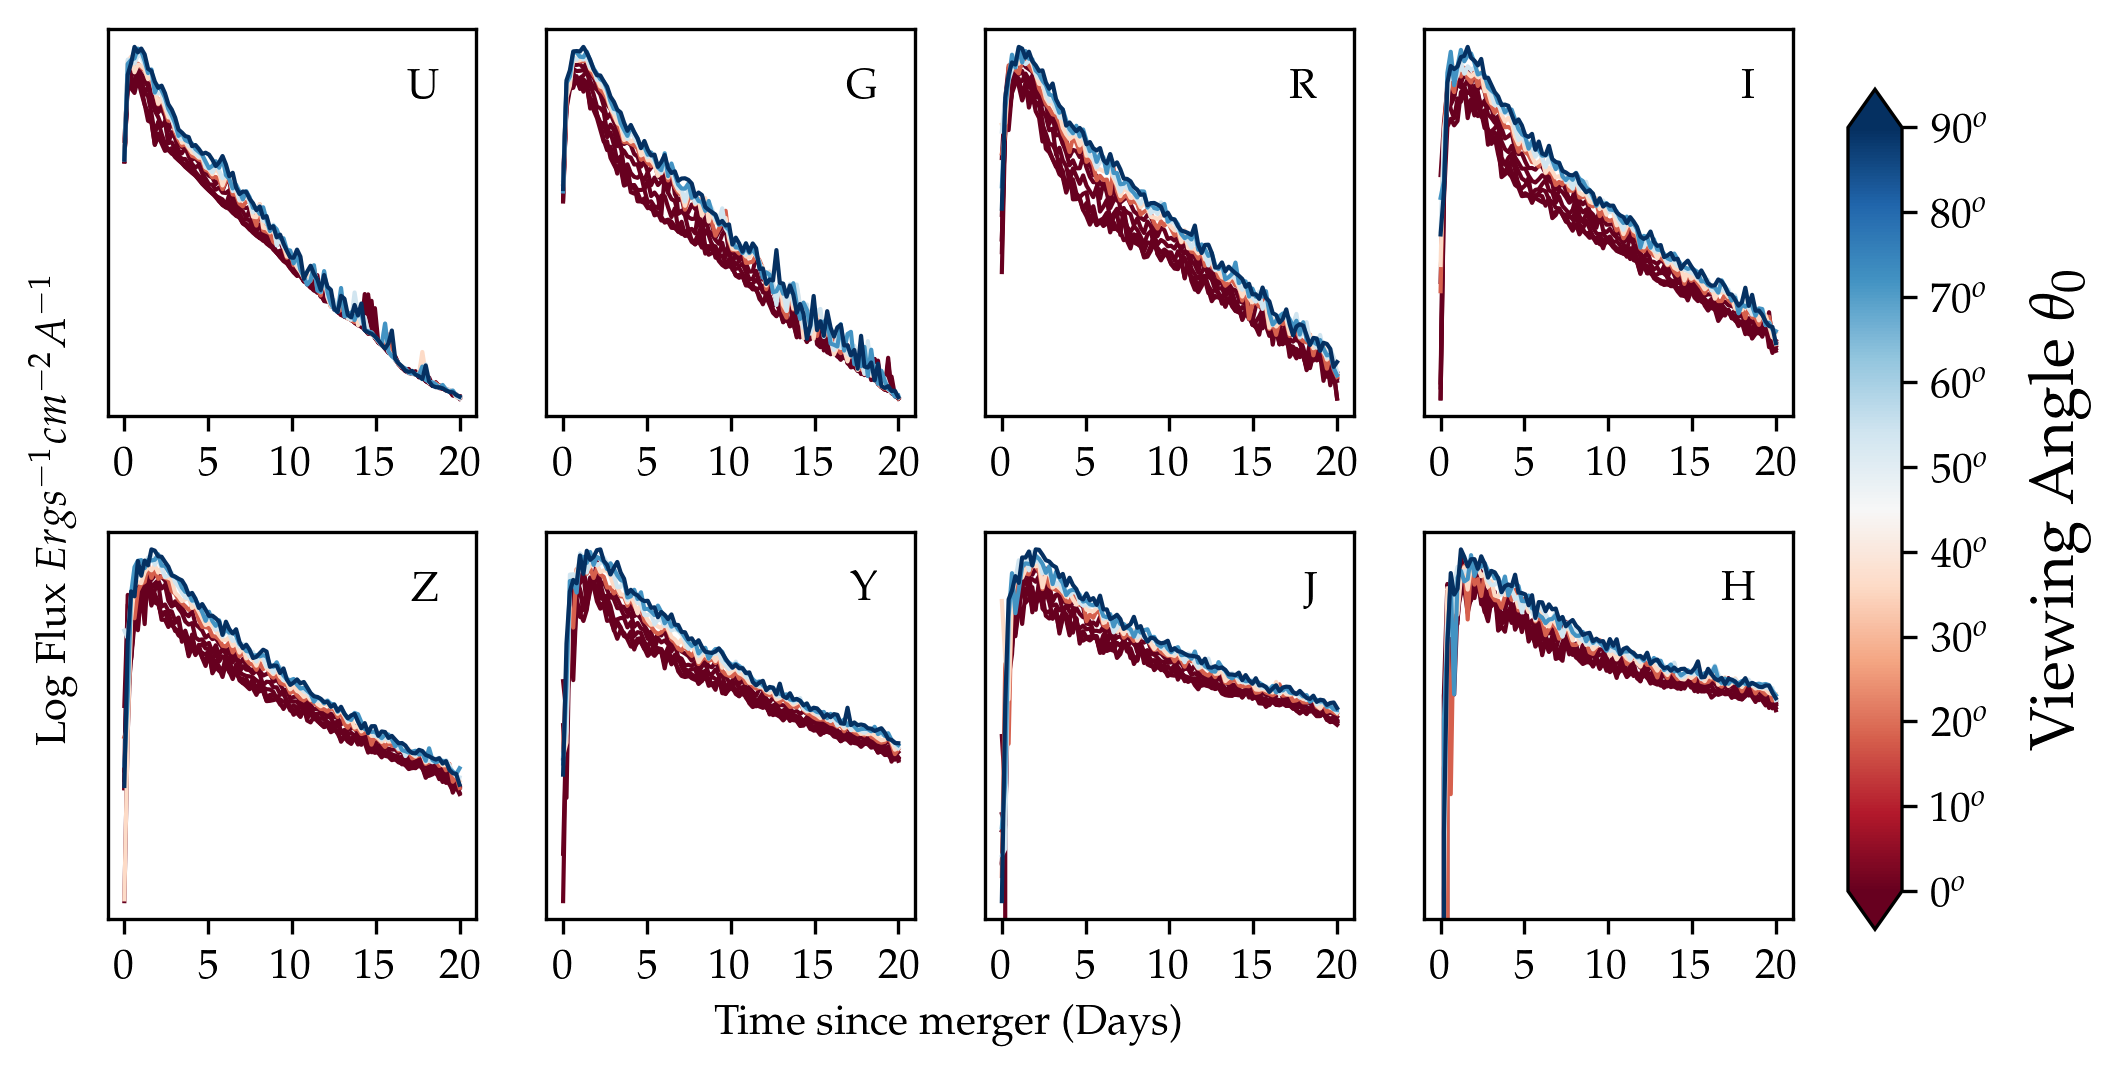

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
data.plot_viewingangle()


In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
# data = LightCurve("reference.csv")
# wv_range = [900]
# iobs_range = [0]
# mejdyn_range = [0.01]
# mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [15]
mejdyn_range = [0.01]
mejwind_range = [0.05]
wv = 1500
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs             0         1         2         3         4         5   \
time_step                                                               
5          0.000109  0.000227  0.000183  0.000473  0.001095  0.000828   

iobs             6         7         8         9         10  
time_step                                                    
5          0.001256  0.000556  0.001347  0.000678  0.001556

In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()


Name : GP regression
Objective : 10.659139045542842
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |  0.38781063166209034  |      +ve      |        
  rbf.lengthscale          |    4.678911133662112  |      +ve      |        
  Gaussian_noise.variance  |   0.2657633178090892  |      +ve      |        


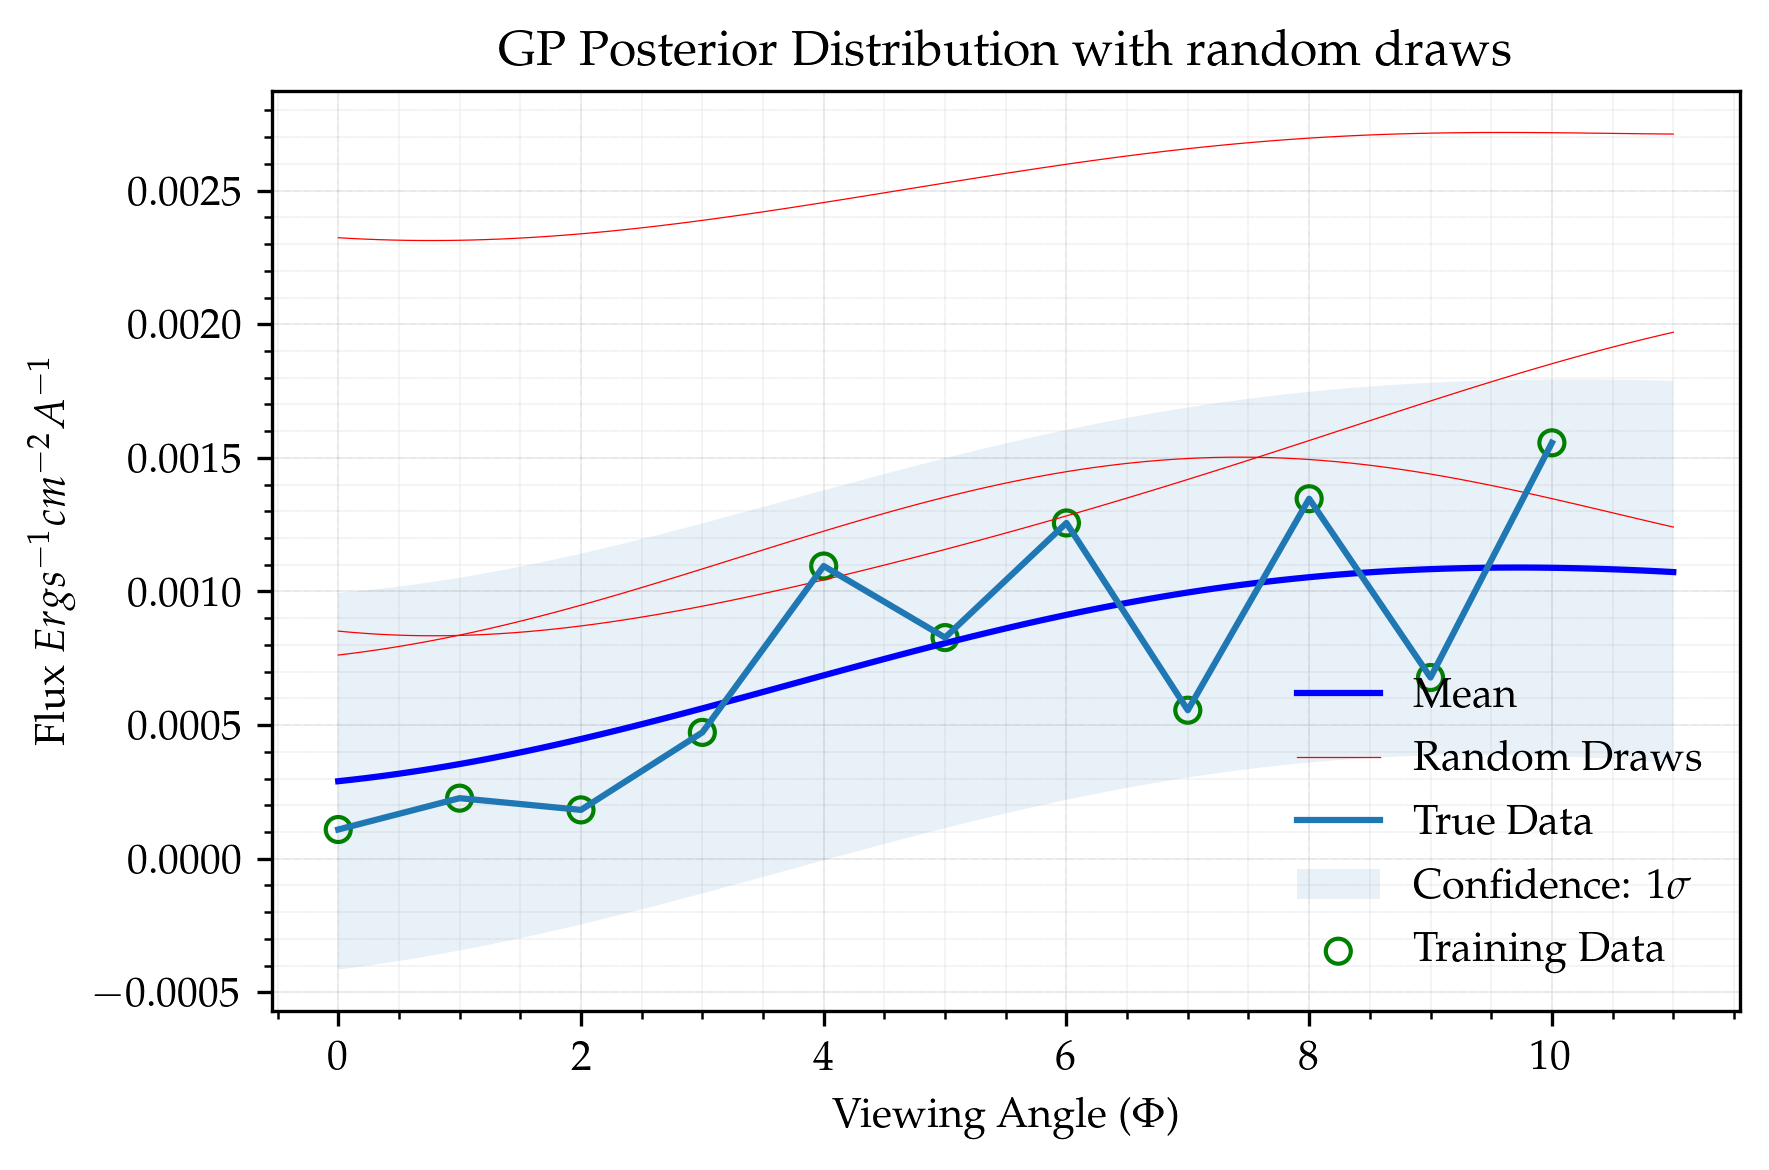

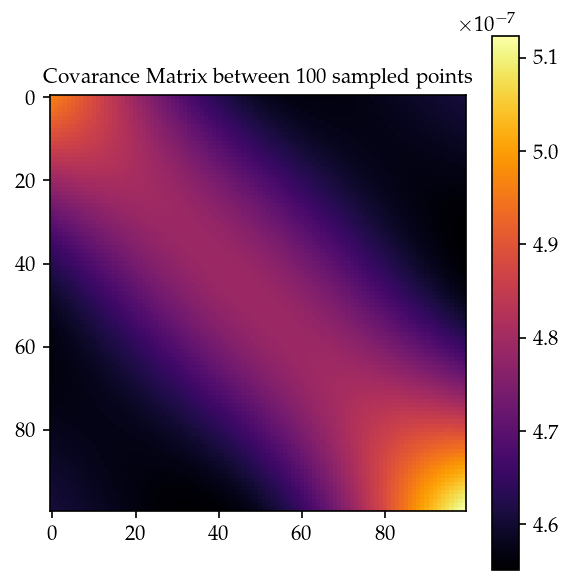

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = False)
plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

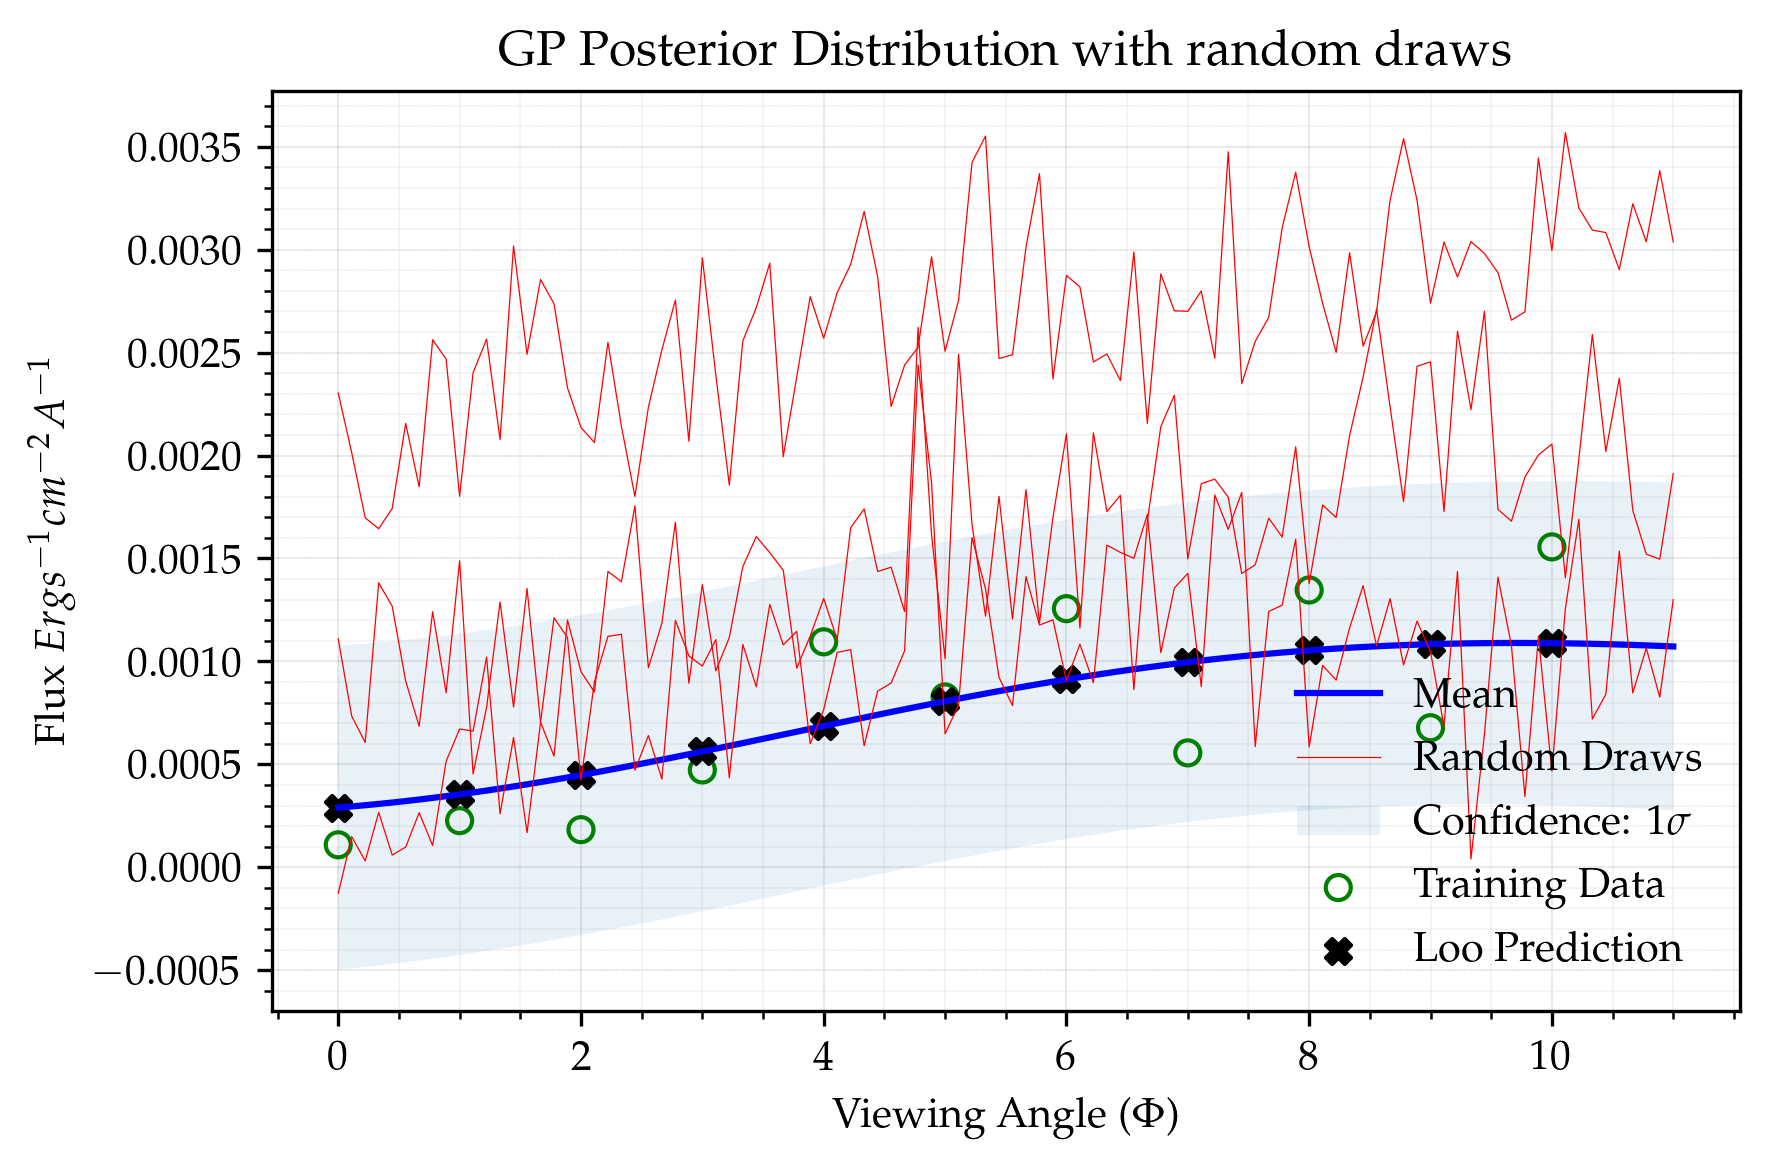

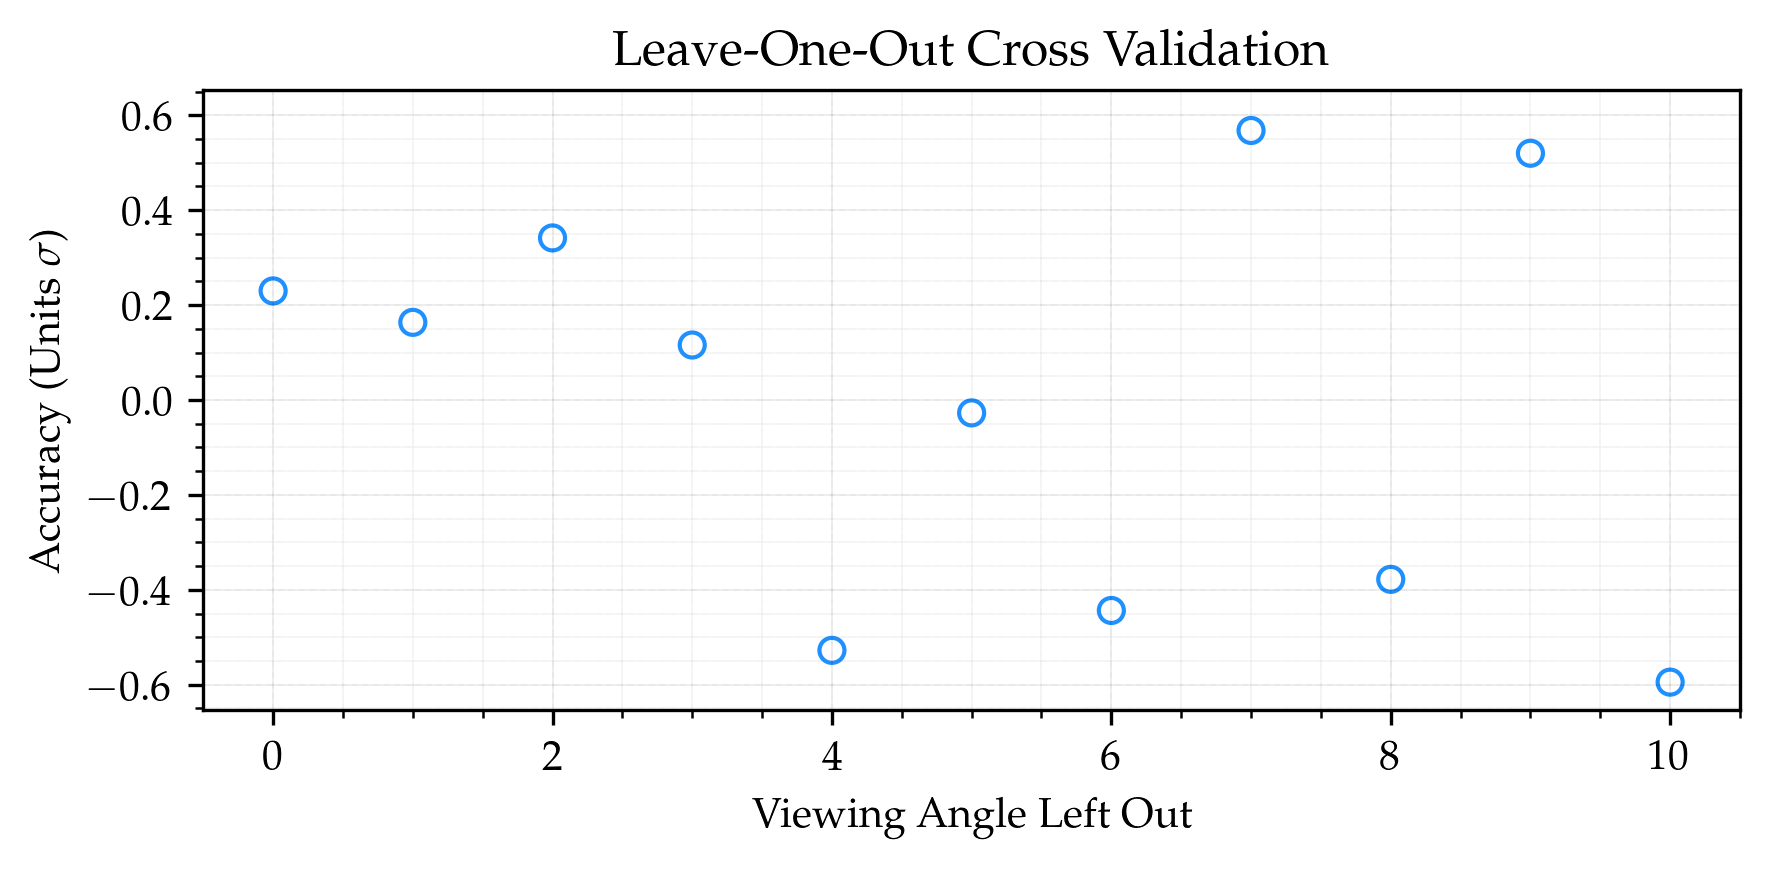

In [14]:
gp.extraction_time = 1
gp.LOOCV()
gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
gp0 = GP("reference.csv")
gp0.extraction_time = 1
gp0.multiple_LOOCV(N = 1, verbose = True)
gp0.loo_list_multiple.shape

100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


(1, 11)

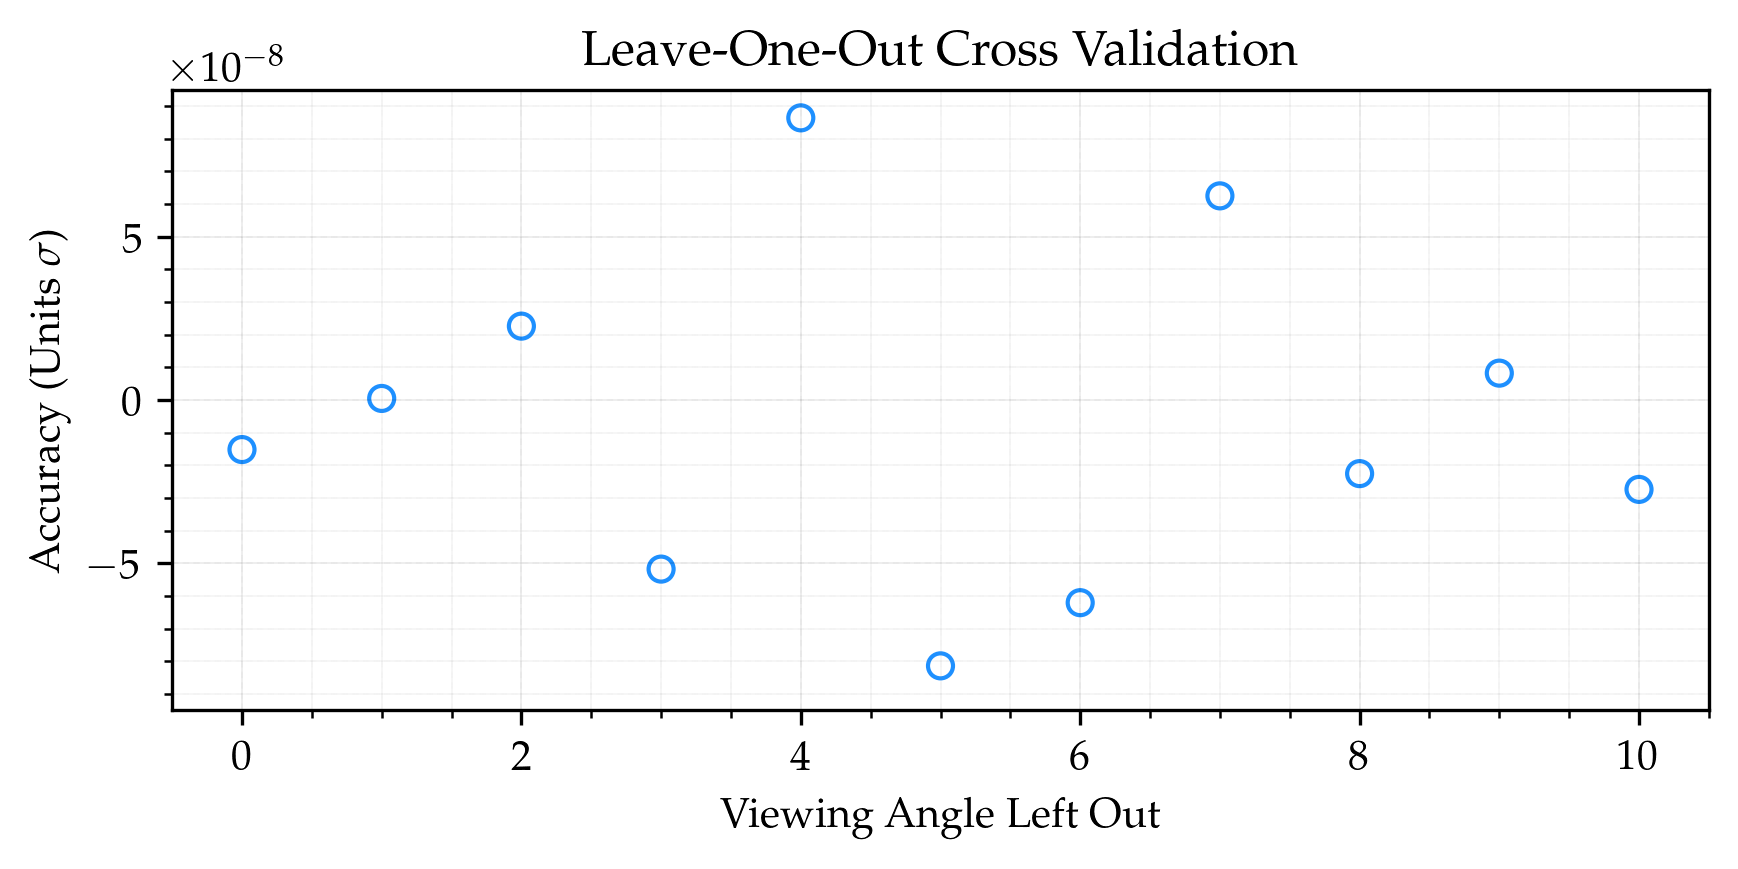

In [16]:
gp0.plot_loocv(plot_type = "multiple")

Inside 5x: 11, Total: 11


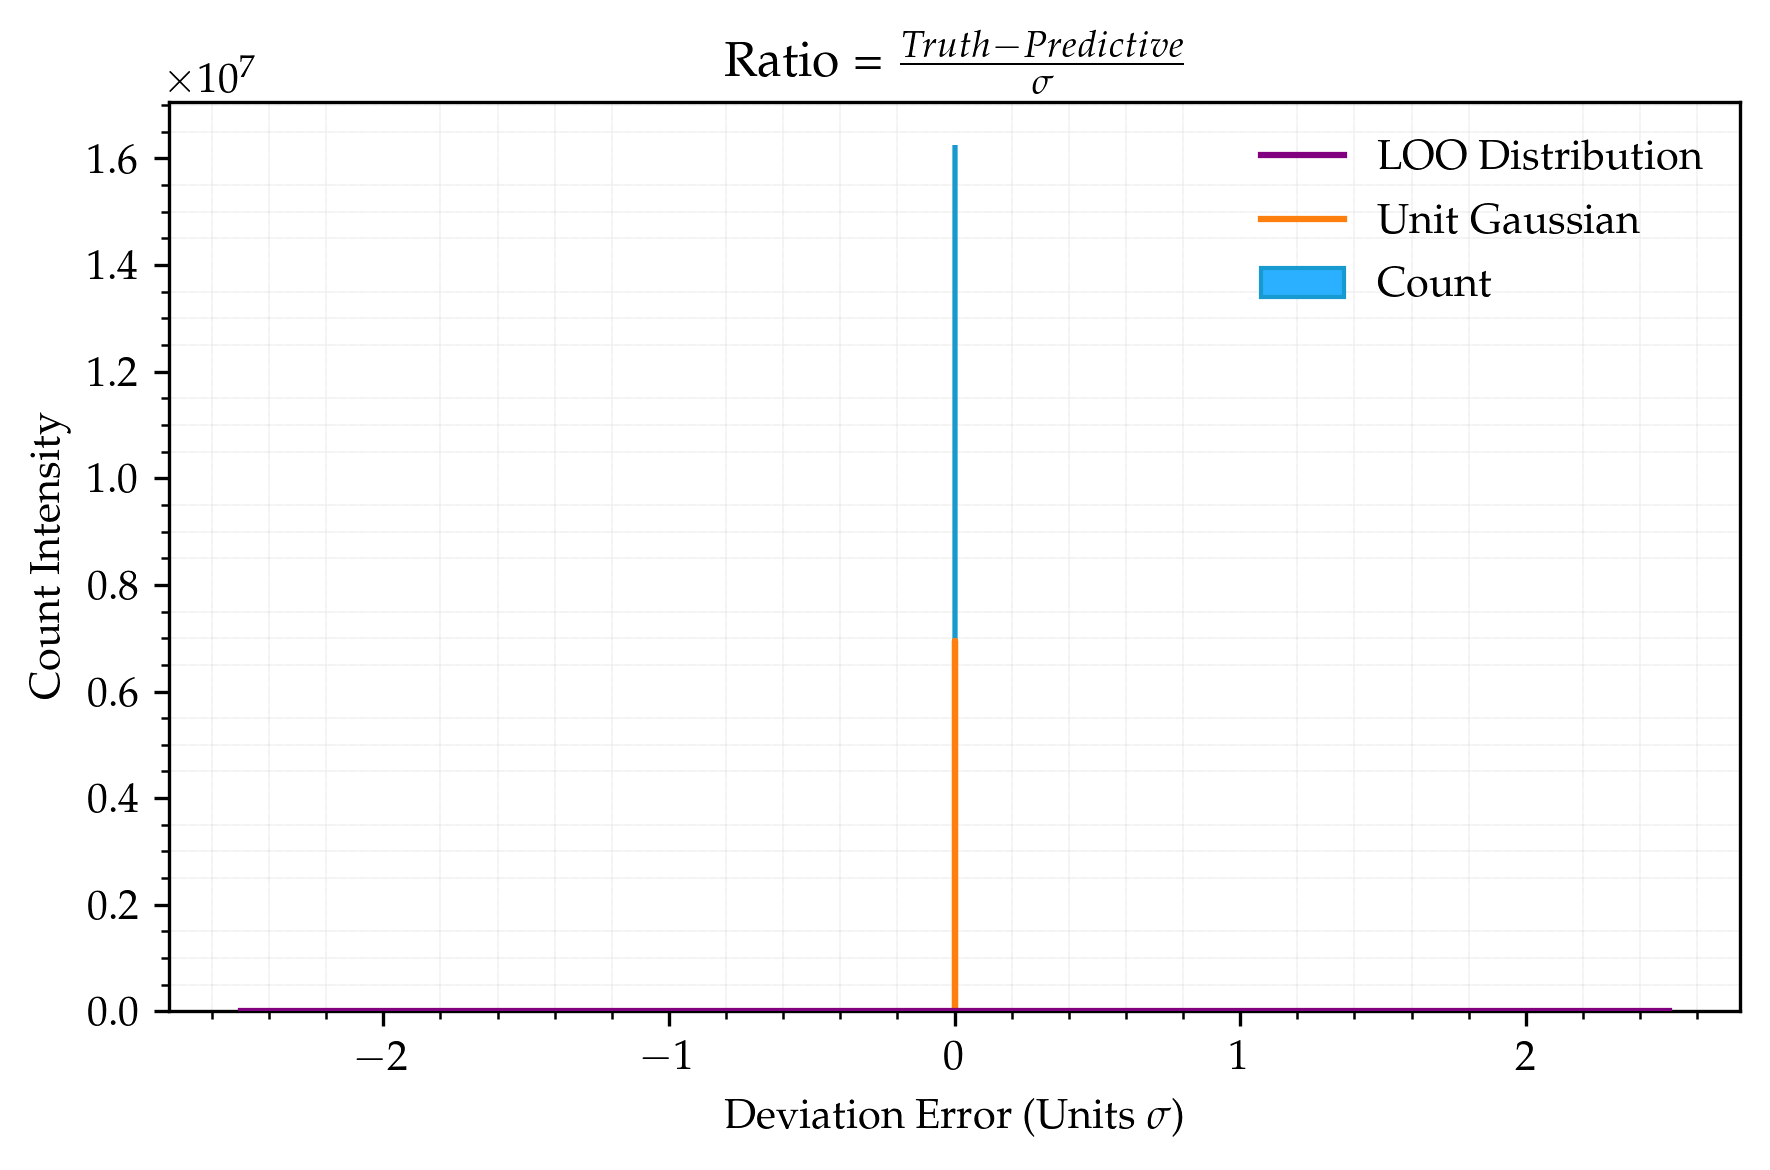

In [17]:
gp0.plot_loocv_histogram()

# Multi-Dimensional Gaussian Process

In [18]:
# gp = GP2D("reference.csv")
# phi_range = [45]
# mejwind_range = []
# mejdyn_range = [0.01]
# wv_range = [900]
# gp.set_selection_range(typ = "mejwind", phi_range = phi_range, 
#                        mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
#                       wv_range = wv_range, verbose = True)
# gp.log_trainingND()
# gp.normalize_training2D()
# # display(gp.training2D)
# gp.setXY()
# gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10))
# gp.set_model(GPy.models.GPRegression(gp.X,gp.Y,gp.kernel))
# gp.model_train(verbose = True)
# gp.model_predict(N = 20, make_cov = True, include_like = True)
# gp.unnormalize_training2D()

In [19]:
# gp.plot_covariance2D()

In [20]:
# gp.model.plot() # GPy Plotting
# gp.plot_posterior2D(verbose = True, lev = 20) # My Plotting

# 2D-LOOCV

In [21]:
gp0 = GP2D("reference.csv")
phi_range = [45]
mejwind_range = [0.05]
mejdyn_range = [0.02]
wv_range = [250]
gp0.extraction_time = 0.5
gp0.set_selection_range(typ = "phi", phi_range = phi_range, 
                       mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                      wv_range = wv_range, verbose = False)
# display(gp0.selected)
gp0.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=1, ARD = True))
gp0.LOOCV_2D(verbose = False)

reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.leng

(True, 0)

# Cross Validation LOO-CV 2D Histogram

In [22]:
# gp = GP2D("reference.csv")
# typ = "mejwind"
# gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10, ARD = True))
# gp.phi_range = [60]
# gp.mejdyn_range = [0.01]
# gp.mejwind_range = [0.05]
# gp.wv_range = [250]
# gp.extraction_time = 0.5
# gp.multiple_LOOCV_2D(typ, verbose = 4, include_like = True, empirical = True)

In [23]:
# gp.plot_loocv_histogram(binning = 20)
# print(f"Failed {sum(gp.failed)}")
# plt.show()

In [24]:
# # Colour graident to see which points are giving those hyperlength values
# plt.scatter(list(gp.lengthscaleList_multiple1), list(gp.lengthscaleList_multiple2)) 
# # plt.xlim(0,5)
# # plt.ylim(0,5)
# plt.show()

# # print(list(gp.lengthscaleList_multiple1)[i], list(gp.lengthscaleList_multiple2)[i])

In [25]:
# gp.plot_hist_lengthscale(gp.lengthscaleList_multiple1.flatten())
# gp.plot_hist_lengthscale(gp.lengthscaleList_multiple2.flatten())
# plt.show()

# Finish Optimization Pipeline

In [26]:
gp0.model_predict(N = 20, make_cov = False, include_like = True)
gp0.unnormalize_training2D()
print(gp0.model.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     0.54932791  |    0.0,5.0    |        
  [1]    |                     0.17835338  |    0.0,5.0    |        


In [27]:
gp0.posterior_mean = 10 ** (gp0.posterior_mean)

In [28]:
gp0.training2D

iobs        0         1         2         3         4         5         6   \
phi                                                                          
0    -2.063788 -2.063788 -2.063788 -2.063788 -2.063788 -2.063788 -2.063788   
15   -2.365513 -2.367067 -2.355040 -2.379645 -2.407424 -2.319003 -2.273240   
30   -2.523792 -2.469032 -2.511943 -2.472035 -2.450408 -2.406194 -2.391089   
45   -2.494118 -2.477399 -2.551031 -2.562028 -2.537288 -2.536600 -2.501111   
60   -2.471418 -2.453729 -2.567303 -2.630154 -2.584242 -2.608412 -2.740502   
75   -2.338632 -2.380281 -2.409225 -2.547922 -2.408212 -2.463416 -2.557803   
90   -2.547324 -2.547324 -2.547324 -2.547324 -2.547324 -2.547324 -2.547324   

iobs        7         8         9         10  
phi                                           
0    -2.063788 -2.063788 -2.063788 -2.063788  
15   -2.211980 -2.203974 -2.213859 -2.150667  
30   -2.274775 -2.195867 -2.159524 -2.154672  
45   -2.532540 -2.428722 -2.345352 -2.265184  
60   -2.418836 -2.476904 -2.492846 -2.227517  
75   -2.663700 -2.638518 -2.500368 -2.425760  
90   -2.547324 -2.547324 -2.547324 -2.547324

In [38]:
gp0.Ntime

[100.0, 0.0, 20.0]

[STATUS] Plotting for: 
[STATUS] mejdyn: [0.02] 
[STATUS] mejwind: [0.05] 
[STATUS] phi: [ 0 15 30 45 60 75 90] 
[STATUS] viewing_angle: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
[STATUS] wavelength: 250


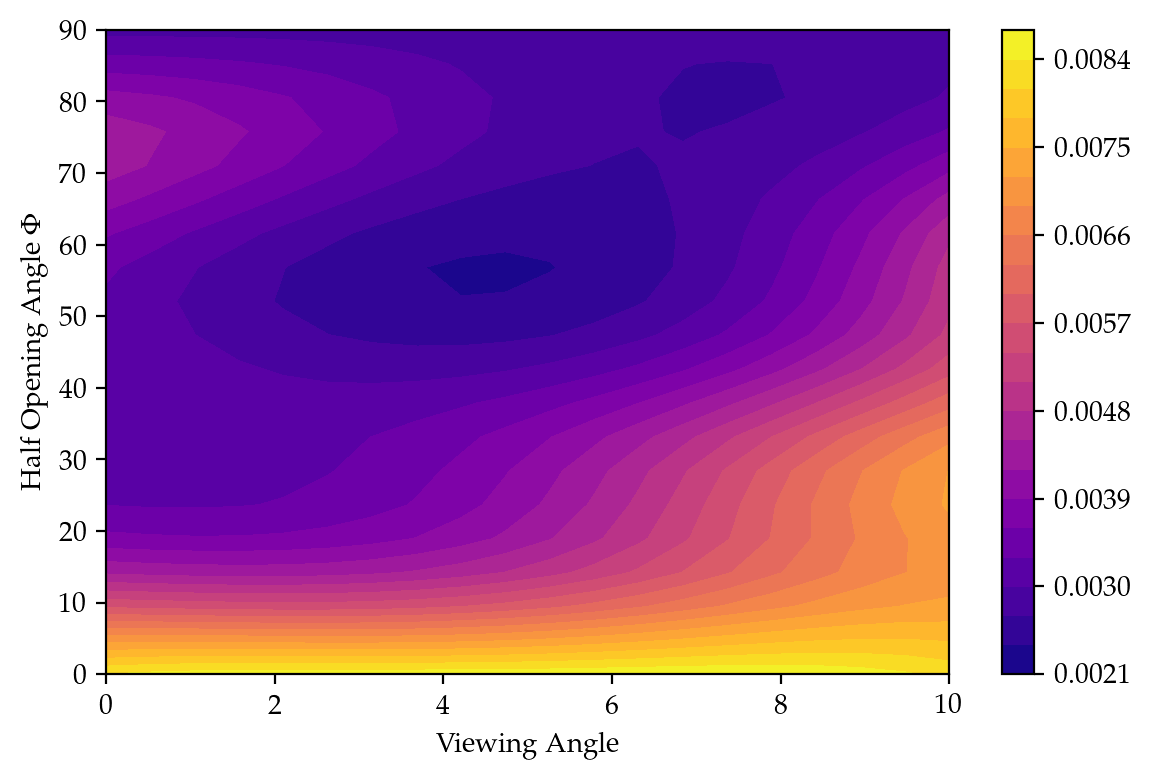

In [29]:
# gp0.model.plot()
gp0.predX1 = np.linspace(min(gp0.iobs_range), max(gp0.iobs_range), gp0.N, endpoint = True)
gp0.predX2 = np.linspace(min(gp0.curr_range_list), max(gp0.curr_range_list), gp0.N, endpoint = True)
gp0.plot_posterior2D(verbose = True, lev = 20)

In [30]:
mat = gp0.posterior_mean.reshape(gp0.N, gp0.N)
mat.shape

(20, 20)

In [31]:
gp0.predX2

array([ 0.        ,  4.73684211,  9.47368421, 14.21052632, 18.94736842,
       23.68421053, 28.42105263, 33.15789474, 37.89473684, 42.63157895,
       47.36842105, 52.10526316, 56.84210526, 61.57894737, 66.31578947,
       71.05263158, 75.78947368, 80.52631579, 85.26315789, 90.        ])

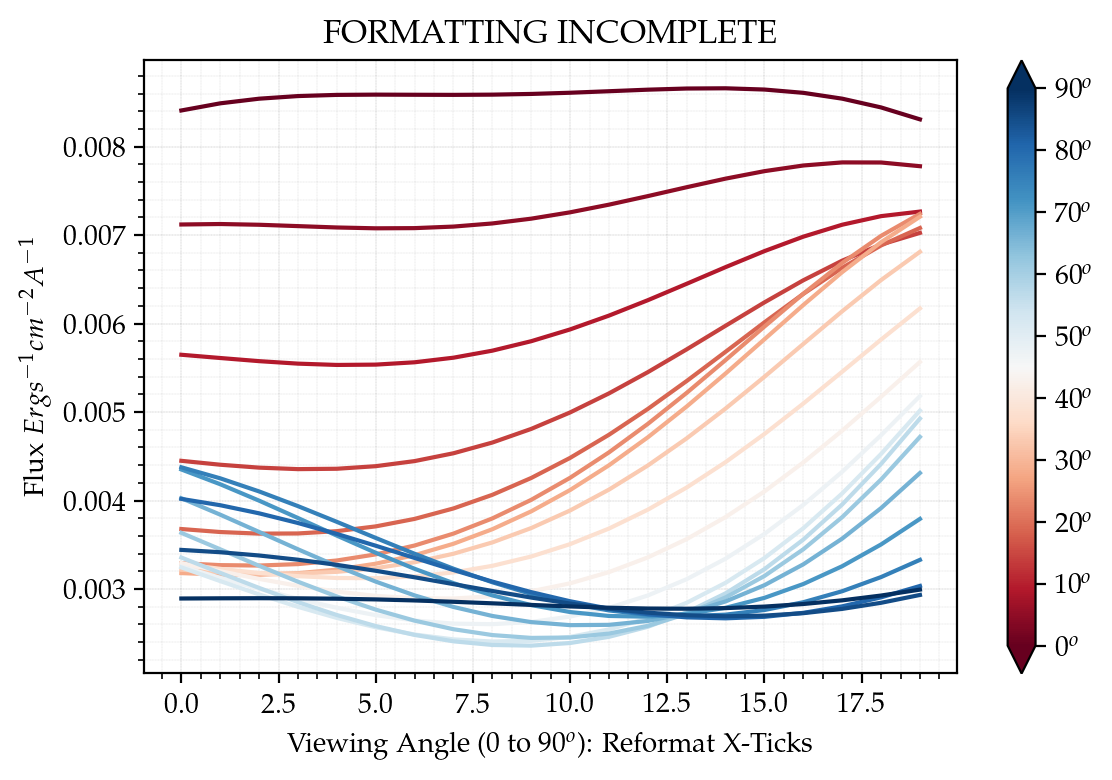

In [32]:
plt.figure(dpi = 200)
colors = plt.cm.RdBu(np.linspace(0,1,len(gp0.predX2)))
my_cmap = "RdBu"
self = gp0
for i in range(len(gp0.predX2)):
    # Goes from left to right, bottom to top
    plt.plot(mat[i], color = colors[i])#, label = f"{gp0.typ} = {gp0.predX2[i]}") 
#     plt.xlabel("Viewing Angle (0 to 11)")
    plt.xlabel(r"Viewing Angle (0 to $90^o$): Reformat X-Ticks")
    plt.ylabel(r"Flux $Erg s^{-1} cm^{-2}A^{-1}$")

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=min(gp0.predX2), vmax=max(gp0.predX2)))
cbar = plt.colorbar(sm, extend='both', format=mpl.ticker.FuncFormatter(self._fmt_degree))    
utkarshGrid()
plt.title("FORMATTING INCOMPLETE")
plt.show()

# PCA (First Attempt)

In [103]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
i=5
time_arr = data.viewingangle[i].to_numpy(dtype = float) #viewing angle = 0, for all time. 

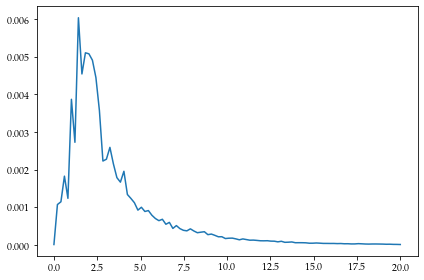

In [104]:
data.Ntime = np.array(data.Ntime, dtype = int)
x = np.linspace(data.Ntime[1], data.Ntime[2], data.Ntime[0], endpoint = True)
plt.plot(x, time_arr)
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

del data.viewingangle['time']
scaler = StandardScaler()
scaler.fit(data.viewingangle)
scaled_data = scaler.transform(data.viewingangle)

pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [106]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
data.viewingangle

(100, 11)
(100, 2)


iobs             0         1         2         3         4         5   \
time_step                                                               
0          0.000019  0.000024  0.000143  0.000015  0.000001  0.000015   
1          0.000163  0.002997    0.0023  0.000686  0.000069  0.001076   
2          0.000531  0.000508  0.000537  0.001523  0.000938   0.00115   
3            0.0019  0.001383  0.001779  0.001951  0.001287   0.00183   
4          0.003944  0.003129  0.002684  0.002802  0.001139  0.001241   
...             ...       ...       ...       ...       ...       ...   
95         0.000019  0.000018  0.000017  0.000018   0.00002  0.000022   
96         0.000017  0.000019  0.000019  0.000018  0.000021  0.000023   
97         0.000014  0.000013  0.000015  0.000016  0.000017  0.000019   
98         0.000016  0.000016  0.000015  0.000015  0.000016  0.000018   
99         0.000013  0.000013  0.000016  0.000015  0.000016  0.000015   

iobs             6         7         8         9         10  
time_step                                                    
0          0.000061  0.000001  0.001129  0.000028  0.000016  
1          0.000078  0.000069  0.000915  0.000187  0.000831  
2          0.001891  0.001543  0.003059  0.003118  0.003301  
3           0.00158  0.003871  0.003775  0.006415  0.002879  
4          0.003355   0.00424  0.006032  0.007629  0.007589  
...             ...       ...       ...       ...       ...  
95         0.000024  0.000028  0.000032   0.00003  0.000032  
96         0.000029  0.000028  0.000028  0.000026  0.000025  
97         0.000018  0.000023  0.000023  0.000024  0.000023  
98         0.000021  0.000021  0.000021  0.000022  0.000022  
99         0.000015  0.000018   0.00002  0.000026  0.000016  

[100 rows x 11 columns]

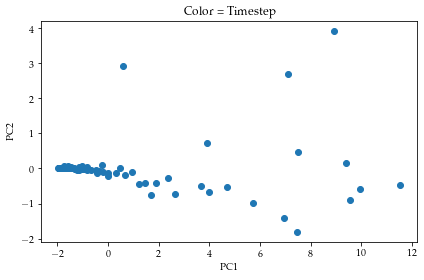

In [107]:
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Color = Timestep")
plt.show()

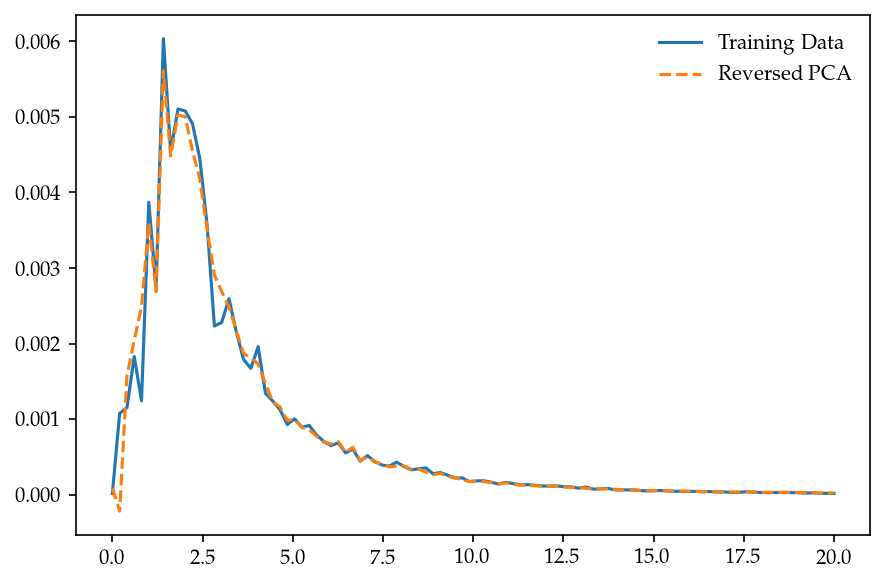

In [110]:
proj0 = pca.inverse_transform(x_pca)
proj = scaler.inverse_transform(proj0)
plt.figure(dpi = 150)
plt.plot(x, time_arr, label = "Training Data")
plt.plot(x, proj.T[i], label = "Reversed PCA", linestyle = "dashed")
plt.legend()
plt.show()